<a href="https://colab.research.google.com/github/Rajeev9-Pondala/Algorithms/blob/main/The_Closest_Pair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'n': 100, 'Theoretical RT n^2 Brute Force': 10000, 'Empirical RT Brute Force': 0.008588171005249024, 'Predicted RT Brute Force': 0.006368915557861328, 'Ratio of Brute Force': 8.588171005249024e-07}
{'n': 100, 'Theoretical RT n^2 Divide and Conquer': 664.3856189774724, 'Empirical RT Divide and Conquer': 0.011101078987121583, 'Predicted RT Divide and Conquer': 0.015313485463460282, 'Ratio Divide and Conquer': 1.6708788796793616e-05}
{'n': 200, 'Theoretical RT n^2 Brute Force': 40000, 'Empirical RT Brute Force': 0.04306724071502686, 'Predicted RT Brute Force': 0.02547566223144531, 'Ratio of Brute Force': 1.0766810178756714e-06}
{'n': 200, 'Theoretical RT n^2 Divide and Conquer': 1528.7712379549448, 'Empirical RT Divide and Conquer': 0.04091513156890869, 'Predicted RT Divide and Conquer': 0.03523678938958645, 'Ratio Divide and Conquer': 2.6763410085894436e-05}
{'n': 300, 'Theoretical RT n^2 Brute Force': 90000, 'Empirical RT Brute Force': 0.14257712364196778, 'Predicted RT Brute Force': 0

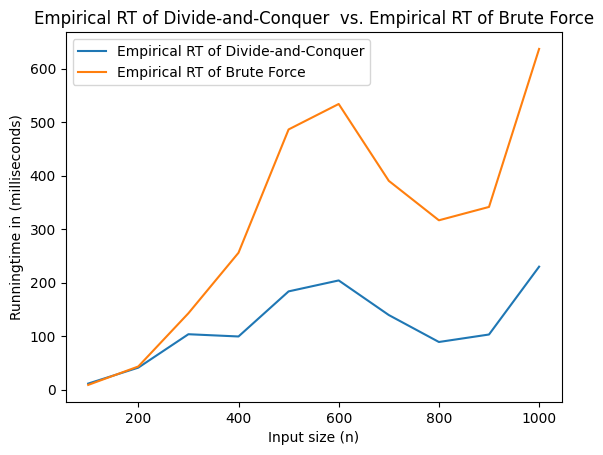

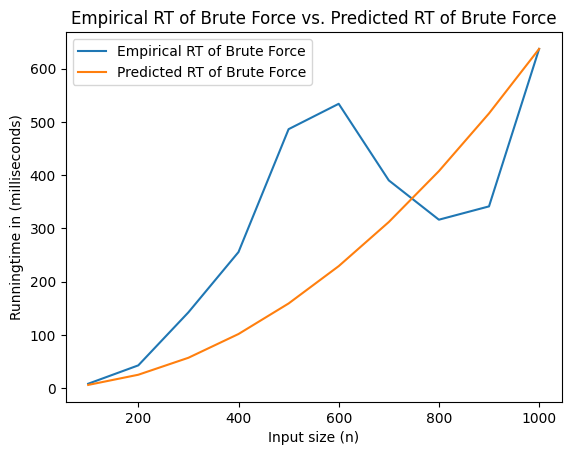

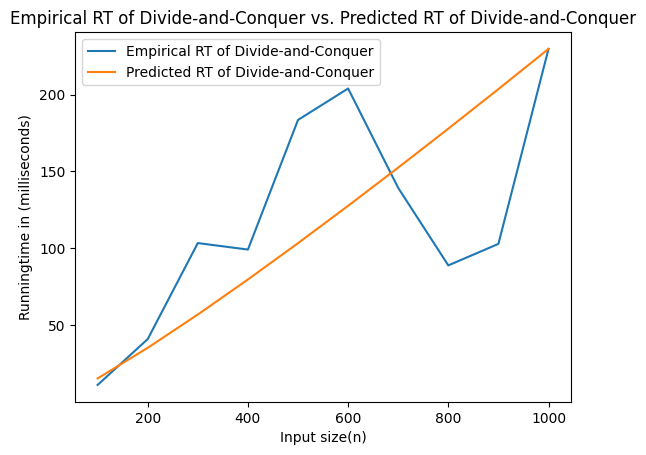

In [ ]:
import math
import matplotlib.pyplot as plt
import random
import time

# Function to calculate the distance between two points
def distance(point1, point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Function to generate random points
def generate_random_points(np, mini, maxi):
    ps = [(random.randint(mini, maxi), random.randint(mini, maxi)) for _ in range(np)]
    return ps

# Brute force method to find the closest pair
def closest_pair_brute_force(input_points):
    min_dist = float('inf')
    closest_pair = (None, None)

    for i, point1 in enumerate(input_points):
        for point2 in input_points[i+1:]:
            dist = distance(point1, point2)
            if dist < min_dist:
                min_dist = dist
                cp = (point1, point2)

    return cp, min_dist

# Recursive function for the divide and conquer

def closest_pair_divide_conquer_rec(px, py):
    if len(px) <= 3:
        return closest_pair_brute_force(px)

    mid = len(px) // 2
    Qx = px[:mid]
    Rx = px[mid:]
    Qy = sorted([p for p in py if p in Qx], key=lambda x: x[1])
    Ry = sorted([p for p in py if p in Rx], key=lambda x: x[1])

    (p1, q1), dist1 = closest_pair_divide_conquer_rec(Qx, Qy)
    (p2, q2), dist2 = closest_pair_divide_conquer_rec(Rx, Ry)

    delta = min(dist1, dist2)
    closer_pair = (p1, q1) if dist1 <= dist2 else (p2, q2)

    Sy = [point for point in py if abs(point[0] - px[mid][0]) < delta]

    for i in range(len(Sy)):
        for j in range(i+1, min(i+15, len(Sy))):
            p, q = Sy[i], Sy[j]
            dst = distance(p, q)
            if dst < delta:
                closer_pair = p, q
                delta = dst

    return closer_pair, delta

# Functions to use keys for sorting
def x_sort_key(point):
  return point[0]
def y_sort_key(point):
    return point[1]

# Function to find the closest pair by Divide and conquer
def closest_pair_divide_conquer(P):
    Px = sorted(P, key=x_sort_key)
    Py = sorted(P, key=y_sort_key)
    return closest_pair_divide_conquer_rec(Px, Py)

# Function to print the results

def print_results(list_sizes, productive_times, brute_force_times):
    bruteforce_maximum_ratio = 0
    divideconquer_maximum_ratio = 0

# Finding the maximum ratios

    for list_size, bruteforce_empirical_RT, dc_emprical_RT in zip(list_sizes, brute_force_times, productive_times):
     bruteforce_time_complexity = list_size ** 2
    divideconquer_time_complexity = list_size * math.log2(list_size)

    bruteforce_ratio = bruteforce_empirical_RT / bruteforce_time_complexity
    divideconquer_ratio = dc_emprical_RT / divideconquer_time_complexity

    bruteforce_maximum_ratio = max(bruteforce_maximum_ratio, bruteforce_ratio)
    divideconquer_maximum_ratio = max(divideconquer_maximum_ratio, divideconquer_ratio)

    for i in range(len(list_sizes)):
            list_size = list_sizes[i]
            bruteforce_time_complexity = list_size ** 2
            divideconquer_time_complexity = list_size * math.log2(list_size)
            bruteforce_empirical_RT = brute_force_times[i]
            dc_emprical_RT = productive_times[i]
            bruteforce_ratio = bruteforce_empirical_RT / bruteforce_time_complexity
            divideconquer_ratio = dc_emprical_RT / divideconquer_time_complexity

 # calculate predicted RT's

            bf_predicted_run_time = bruteforce_maximum_ratio * bruteforce_time_complexity
            dc_predicted_run_time = divideconquer_maximum_ratio * divideconquer_time_complexity
            print({
                "n": list_size,
                "Theoretical RT n^2 Brute Force": bruteforce_time_complexity,
                "Empirical RT Brute Force": bruteforce_empirical_RT,
                "Predicted RT Brute Force": bf_predicted_run_time,
                "Ratio of Brute Force": bruteforce_ratio,
            })
            print({
                "n": list_size,
                "Theoretical RT n^2 Divide and Conquer": divideconquer_time_complexity,
                "Empirical RT Divide and Conquer": dc_emprical_RT,
                "Predicted RT Divide and Conquer": dc_predicted_run_time,
                "Ratio Divide and Conquer": divideconquer_ratio
            })
    return bruteforce_maximum_ratio, divideconquer_maximum_ratio


# Function for plot graphs comparing the empirical and predicted run times
def plot_graphs(input_sizes, empirical_running_times, brute_force_times, C1, C2):

    empirical_running_times = [i*1000 for i in empirical_running_times]
    brute_force_times = [i*1000 for i in brute_force_times]

    # Empirical Runningtime of Algo-1 and Empirical Runningtime of Algo-2
    plt.figure()
    plt.plot(input_sizes,empirical_running_times, label="Empirical RT of Divide-and-Conquer")
    plt.plot(input_sizes, brute_force_times, label="Empirical RT of Brute Force")
    plt.xlabel("Input size (n)")
    plt.ylabel("Runningtime in (milliseconds)")

    plt.title("Empirical RT of Divide-and-Conquer  vs. Empirical RT of Brute Force")
    plt.legend()
    plt.show()

    # Empirical Runningtime of Algo-1 and Predicted Runningtime of Algo-1
    plt.figure()
    plt.plot(input_sizes, brute_force_times, label="Empirical RT of Brute Force")
    plt.plot(input_sizes, [C1 * n ** 2*1000 for n in input_sizes], label="Predicted RT of Brute Force")
    plt.xlabel("Input size (n)")
    plt.ylabel("Runningtime in (milliseconds)")

    plt.title("Empirical RT of Brute Force vs. Predicted RT of Brute Force")
    plt.legend()
    # Empirical Runningtime of Algo-2 and Predicted Runningtime of Algo-2
    plt.figure()
    plt.plot(input_sizes, empirical_running_times, label="Empirical RT of Divide-and-Conquer")
    plt.plot(input_sizes, [C2 * n * math.log2(n)*1000 for n in input_sizes], label="Predicted RT of Divide-and-Conquer")
    plt.xlabel("Input size(n)")
    plt.ylabel("Runningtime in (milliseconds)")

    plt.title("Empirical RT of Divide-and-Conquer vs. Predicted RT of Divide-and-Conquer")
    plt.legend()

# Generate random points and measuring executions
if __name__ == "__main__":
    # Input sizes
    sizes = [i for i in range(100, 1001, 100)]
    bruteforce_times = []
    divideconquer_times = []
    number_of_running = 10

    for size in sizes:
        temp_bruteforce_times = []
        temp_divideconquer_times = []

        # Generate random points for the given size
        points = generate_random_points(size, 0, 1e9)

        # Measure execution time for brute force algorithm
        initial_time = time.time()
        for _ in range(number_of_running):
            closest_pair_brute_force(points)
        temp_bruteforce_times.append((time.time() - initial_time) / number_of_running)

        # Measure execution time for divide and conquer algorithm
        initial_time = time.time()
        for _ in range(number_of_running):
            closest_pair_divide_conquer(points)
        temp_divideconquer_times.append((time.time() - initial_time) / number_of_running)

        # Calculate the average execution time for each algorithm
        bruteforce_times.append(sum(temp_bruteforce_times))
        divideconquer_times.append(sum(temp_divideconquer_times))

    C1, C2 = print_results(sizes, divideconquer_times, bruteforce_times)
    plot_graphs(sizes, divideconquer_times, bruteforce_times, C1, C2)